# Aprendizaje Automático [UCV]

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

# Clasificación

Recordemos que buscamos una función $f$ sobre un conjunto de *clases* que podemos llamar $C$ que es discreto y finito.

## Clasificación Binaria

Si $|C|=2$ decimos que estamos en un escenario de clasificación binaria. Normalmente, los valores de $C$ son $\{-1, 1\}$ o $\{0, 1\}$ dependiendo de la utilidad en la formulación del problema.

Veamos el caso más sencillo de clasificación en el escenario de clasificación binaria que conecta un poco con *regresión lineal*

# Regresión Logística

## El modelo lineal

Recordemos el caso de regresión donde la función $f$ es:

$$f(x) = x^T\beta = \beta^T x \text{ para algún } x \in X$$

siendo $X \in \mathbb{R}^{n, m}$ nuestro conjunto de datos que denominamos *matriz de datos*

La solución cerrada (ecuaciones normales) para conseguir *el mejor modelo* para $\beta \in \mathbb{R}^m$ es: $$\beta^* = (X^T X)^{-1}X^Ty$$

siendo $y \in \mathbb{R}^n $ el vector de respuestas de nuestro dataset $(X, y)$

## Discusión

Cómo podríamos clasicar datos asumiendo que el setup:

1. Matriz de datos $X$
1. la variable a predecir es $y \in \{0, 1\}$

Para simplificar la idea, asumamos que $X \in \mathbb{R}$

_Colocar imágenes de discusión_

In [118]:
#@ plot_curve(f, _params=[], _range=(-5, 5), _points=100)

import matplotlib.pyplot as plt

def plot_curve(f, _params=[], _range=(-5, 5), _points=100):
  """
  Método para graficar una curva f(x) cuyos parámetros fijos son _params en el rango _range(min, max) usando subsampling de _points

  :param f: La función a graficar
  :param _params: Los parámetros fijos de la función
  :param _range: El rango de X (min, max)
  :param _points: Número de puntos donde vamos a subsamplear a f

  :returns: Nada
  """
  X = np.linspace(_range[0], _range[1], _points)
  plt.plot(X, np.array(list(map(lambda x: f(x, *_params), X))))

### Graficando la función logística

### La función logística

Conocidad también como curva sigmoide:

$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$


1. Qué valores usaríamos nosotros?


In [119]:
import numpy as np

In [ ]:
plot_curve(f, _params=[], _range=(-5, 5), _points=100):

In [120]:
f = lambda x, L, k, x0: L/(1.0 + np.exp(-1.0*k*(x-x0)))

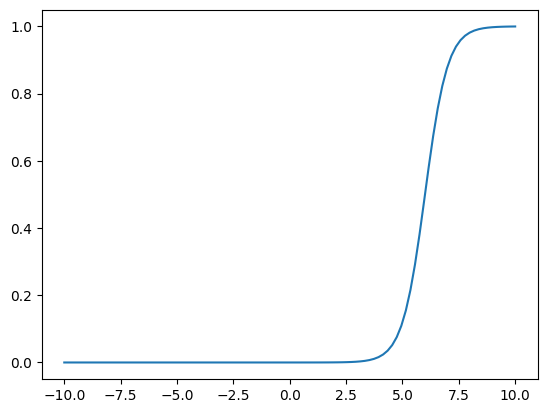

In [126]:
plot_curve(f, (1, 2, 6), _range=(-10, 10))

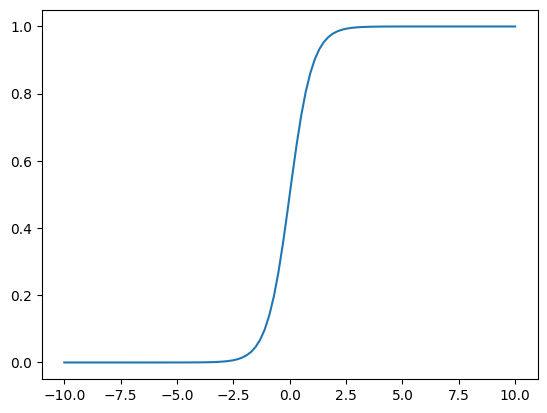

In [127]:
plot_curve(f, (1, 2, 0), _range=(-10, 10))

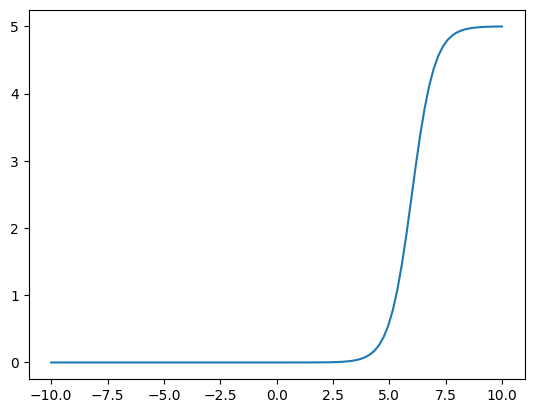

In [123]:
plot_curve(f, (5, 2, 6), _range=(-10, 10))

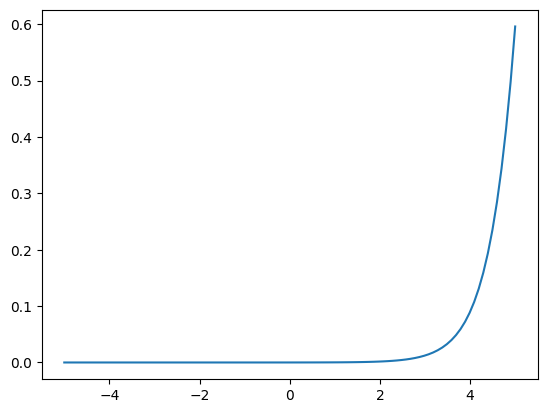

In [121]:
plot_curve(f, (5, 2, 6))

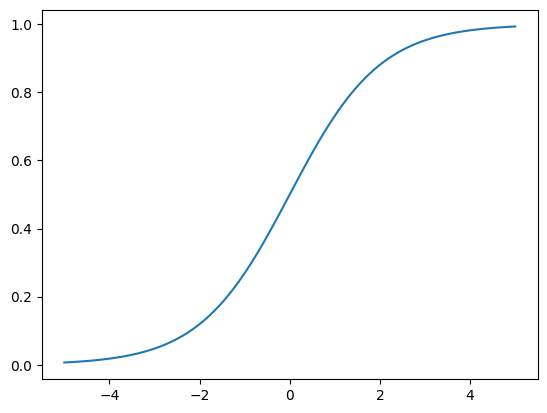

In [136]:
plot_curve(f, (1, 1, 0), _range=(-5, 5))

### Scipy

In [137]:
from scipy.stats import logistic
# logistic.cdf -> cummalitive density function

FDA

P(x<=X)

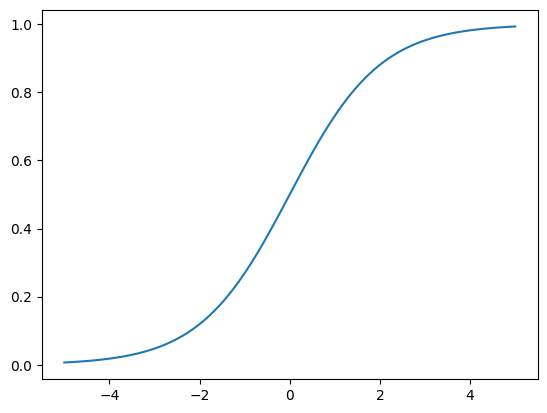

In [46]:
plot_curve(logistic.cdf)

## El modelo logístico

Supongamos que tenemos una matriz de datos $X$ y la variable a predecir es $y \in \{0, 1\}$

En general, buscamos conseguir predecir _la probabilidad_ de que una instancia de nuestro dataset $x_i$ pertenezca a una categoría $0$ o $1$.

Si recordamos definición de probabilidad condicional, queremos $P(y_i| x_i)$ para todo $i$ en el dataset.

Asumamos por simplicidad que $x_i$ es solo una columna.

Buscamos $P(y_i=1 | x_i=a)$ y $P(y_i=0 | x_i=a)$ para decidir si $x_i$ pertenece a la clase $1$ o $0$, respectivamente.

### El caso simple

El caso simple para regresión logística

$$
f(x)=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}
$$

1. Cómo podemos reescribir la definición que tenemos? $$ f(x)=\frac{L}{1+e^{-k\left(x-x_0\right)}}$$

#### Propiedad importante de f

Con manipulaciones simples, podemos demostrar que:

$$\frac{f(x)}{1-f(x)}=e^{\beta_0+\beta_1 x}$$

Por lo que,

$$\log \left(\frac{f(x)}{1-f(x)}\right)=\beta_0+\beta_1 x$$

#### Tenemos f, quién es L?

Usando la función de verosimilitud (likelihood) asumiendo independencia para cada instancia de $X$ buscamos:

$$L\left(\beta_0, \beta_1\right)=\prod_{i} f\left(x_i\right)^{y_i} \left(1-f\left(x_{i}\right)\right)^{1-y_i} $$

Cuya representación algunas veces varía a:

$$L\left(\beta_0, \beta_1\right)=\prod_{i: y_i=1} f\left(x_i\right) \prod_{i^{\prime}: y_{i^{\prime}}=0}\left(1-f\left(x_{i^{\prime}}\right)\right) $$

#### Predicción

Una vez que conseguimos el modelo óptimo $\beta^*$, la predicción es:

$$\hat{p}(x_i)=\frac{e^{\beta^*_0+\beta^*_1 x_i}}{1+e^{\beta^*_0+\beta^*_1 x_i}}$$

### Regresión Logística Múltiple

Consideramos ahora el problema de predecir una clase binaria con múltiples predictores. Haciendo analogía y extendiendo la idea de regresión logística simple tenemos:

$$
\log \left(\frac{f(x)}{1-f(x)}\right)= \beta^T x = \beta_0+\beta_1 x_0+\cdots+\beta_m x_m
$$
donde $x=\left(x_1, \ldots, x_m\right)$ son los $m$ predictores. Y la función de predicción es
$$
f(x)=\frac{e^{x^T \beta^* }}{1+e^{x^T \beta^* }}=\frac{e^{\beta_0+\beta_1 x_1+\cdots+\beta_m x_m}}{1+e^{\beta_0+\beta_1 x_1+\cdots+\beta_m x_m}} .
$$



Usaremos el módulo [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function) de Scikit-Learn

In [138]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#### Caso binario

In [146]:
X, y = load_iris(return_X_y=True)

In [141]:
X.shape

(150, 4)

In [142]:
y.shape

(150,)

In [100]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
y > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [165]:
y = np.array(y>0).astype(int)

In [149]:
arr = []
for yi in y:
  if yi == 0:
    arr.append(0)
  else:
    arr.append(1)
np.array(arr)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [151]:
np.array([0 if yi==0 else 1 for yi in y])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [154]:
# random_state -> "la semilla (seed) de los RNG (random number generators)" -> Reproducibilidad

model = LogisticRegression(max_iter=1000, random_state=0).fit(X, y)

In [166]:
# penalty = None -> No tener regularización, LASSO y Ridge.
model = LogisticRegression(random_state=0, max_iter=1000, penalty=None).fit(X, y)

In [167]:
model.predict(X[:2, :])

array([0, 0])

In [171]:
model.predict(X[:50, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [163]:
X[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [172]:
model.predict_proba(X[:1, :])

array([[9.99999996e-01, 3.94190051e-09]])

In [ ]:
[0.99..9 0]

In [105]:
model.intercept_

array([-1.18494836])

In [106]:
model.coef_

array([[-2.02162242, -6.99849918, 11.14813559,  5.15488554]])

$$

##### Estamos haciendo los mismos cálculos?

In [112]:
X[:1, :] @ model.coef_[0]

array([-18.16665451])

In [113]:
X[:1, :] @ model.coef_[0] + model.intercept_

array([-19.35160286])

In [114]:
np.exp(X[:1, :] @ model.coef_[0] + model.intercept_)

array([3.94190053e-09])

Ahora tenemos 4 parámetros por columna `_coef` más el punto de corte `intercept`

$$\hat{p}(x_0)=\frac{e^{x^T \beta^* }}{1+e^{x^T \beta^* }}=\frac{e^{\beta^*_0+\beta^*_1 x_{00}+\beta^*_2 x_{01}+\beta^*_3 x_{02}+\beta^*_1 x_{03}}}{1+e^{\beta^*_0+\beta^*_1 x_{00}+\beta^*_2 x_{01}+\beta^*_3 x_{02}+\beta^*_1 x_{03}}}$$

In [173]:
np.exp(X[:1, :] @ model.coef_[0] + model.intercept_) / (1 + np.exp(X[:1, :] @ model.coef_[0] + model.intercept_))

array([3.94190051e-09])

$$1-\hat{p}(x_i)=1-\frac{e^{\beta^*_0+\beta^*_1 x_i}}{1+e^{\beta^*_0+\beta^*_1 x_i}}$$

In [174]:
np.array([1.0]) - np.exp(X[:1, :] @ model.coef_[0] + model.intercept_) / (1 + np.exp(X[:1, :] @ model.coef_[0] + model.intercept_))

array([1.])

### Caso Multinomial

Es posible extender la definición para casos con más de 1 clase y además con $m>1$

Asumamos que $|C| = K$

$$
\operatorname{Pr}(y=k \mid X=x)=\frac{e^{\beta_{k 0}+\beta_{k 1} x_1+\cdots+\beta_{k m} x_m}}{1+\sum_{l=1}^{K-1} e^{\beta_{l 0}+\beta_{l 1} x_1+\cdots+\beta_{l m} x_m}}
$$
para $k=1, \ldots, K-1$, y
$$
\operatorname{Pr}(y=K \mid X=x)=\frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l 0}+\beta_{l 1} x_1+\cdots+\beta_{l m} x_m}} .
$$

No es difícil probar que: $k=1, \ldots, K-1$,
$$
\log \left(\frac{\operatorname{Pr}(y=k \mid X=x)}{\operatorname{Pr}(Y=K \mid X=x)}\right)=\beta_{k 0}+\beta_{k 1} x_1+\cdots+\beta_{k m} x_m
$$


In [175]:
X, y = load_iris(return_X_y=True)

In [176]:
X[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [178]:
model = LogisticRegression(random_state=0, max_iter=10000, penalty=None, multi_class="multinomial").fit(X, y)

In [179]:
model.predict(X[:2, :])

array([0, 0])

In [180]:
model.predict_proba(X[:2, :])

array([[1.00000000e+00, 2.09745715e-31, 3.23880813e-58],
       [1.00000000e+00, 1.23379546e-24, 8.80642052e-50]])

In [81]:
model.score(X, y)

0.9866666666666667

In [181]:
model.intercept_

array([  3.97751891,  19.33028473, -23.30780364])

In [83]:
model.coef_

array([[  7.35275466,  20.39784579, -30.26354695, -14.14340745],
       [ -2.44378438,  -6.85846875,  10.41707167,  -2.07137781],
       [ -4.90897028, -13.53937704,  19.84647528,  16.21478526]])